In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm

In [2]:
from Weighted_KShell_Decomposition import wkshell_decomposition

In [3]:
import warnings
warnings.filterwarnings('ignore')

['bus_stops_wszone.dbf', 'bus_stops_wszone.shp', 'net_202001_15.net', 'OD_bus', 'net_202001_05.net', 'net_202001_06.net', 'origin_destination_train_201912.csv.xz', 'train_station_wszone.prj', 'origin_destination_train_202001.csv.xz', 'train_station_wszone.dbf', 'OD_202001_weekend.csv.xz', 'net_202001_22.net', 'subzone_centroid.csv', 'OD_201912_weekday.csv.xz', 'origin_destination_bus_201911.csv.xz', 'net_202001_19.net', 'net_202001_18.net', 'train_station_wszone.cpg', 'OD_PT', 'train_station_wszone.shx', 'net_202001_10.net', 'OD_201911_weekend.csv.xz', 'origin_destination_train_201911.csv.xz', 'net_202001_weekend.net', 'subzone_centroid_pos.json', '.ipynb_checkpoints', 'net_202001_21.net', 'origin_destination_bus_202001.csv.xz', 'OD_201912_weekend.csv.xz', 'net_202001_07.net', 'origin_destination_bus_201912.csv.xz', 'net_202001_23.net', 'region-2014', 'train_station_wszone.shp', 'net_202001_weekday.net', 'net_202001_16.net', 'OD_train', 'bus_stops_wszone.shx', 'OD_202001_weekday.csv.xz

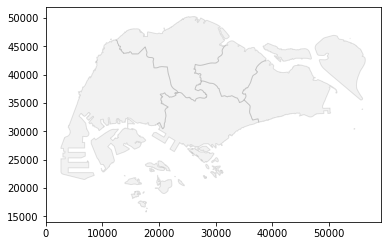

In [4]:
data_dir = "../data"
print(os.listdir(data_dir))

#os.listdir("../data")
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

data

In [33]:
day = "weekday" # "weekend"
fp = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg1 = nx.read_pajek(fp)
dg1.number_of_nodes(), dg1.number_of_edges()

(303, 30043)

In [34]:
day = "weekend"
fp2 = os.path.join(data_dir, "net_202001_{}.net".format(day))
dg2 = nx.read_pajek(fp2)
dg2.number_of_nodes(), dg2.number_of_edges()

(303, 30043)

run k-shell decomposition

In [40]:
node_ks_weekday = wkshell_decomposition(dg1.copy(), direction="in", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)
node_ks_weekday2 = wkshell_decomposition(dg1.copy(), direction="out", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)

100%|██████████| 303/303 [00:01<00:00, 175.80it/s]


In [41]:
node_ks_weekend = wkshell_decomposition(dg2.copy(), direction="in", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)
node_ks_weekend2 = wkshell_decomposition(dg2.copy(), direction="out", alpha=1., beta=1., filter_edge_weight=None, group_k_by=1, normalize_edges_by_median=False)

100%|██████████| 303/303 [00:01<00:00, 161.36it/s]


In [42]:
df_ks = pd.DataFrame.from_dict({"weekday_in_core":node_ks_weekday, "weekday_out_core":node_ks_weekday2, 
                                "weekend_in_core":node_ks_weekend, "weekend_out_core":node_ks_weekend2})
#df_ks.head()

Text(0, 0.5, 'out core')

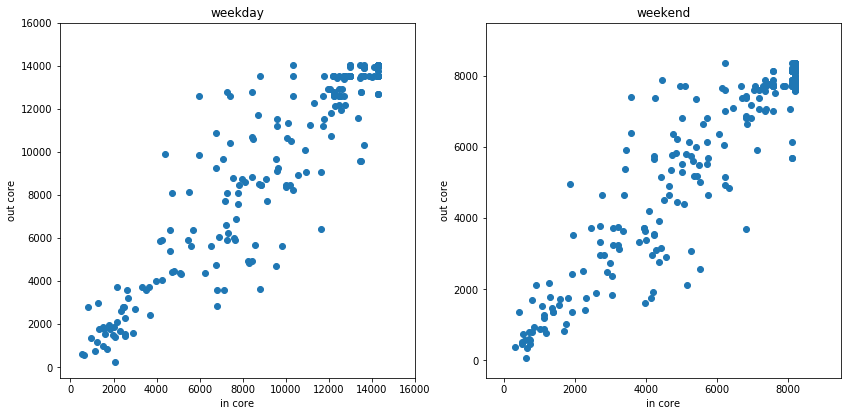

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
axs[0].scatter(df_ks["weekday_in_core"], df_ks["weekday_out_core"])
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlim([-500, 16000])
axs[0].set_ylim([-500, 16000])
axs[0].set_xlabel("in core")
axs[0].set_ylabel("out core")

axs[1].scatter(df_ks["weekend_in_core"], df_ks["weekend_out_core"])
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlim([-500, 9500])
axs[1].set_ylim([-500, 9500])
axs[1].set_xlabel("in core")
axs[1].set_ylabel("out core")

Text(0, 0.5, 'out core')

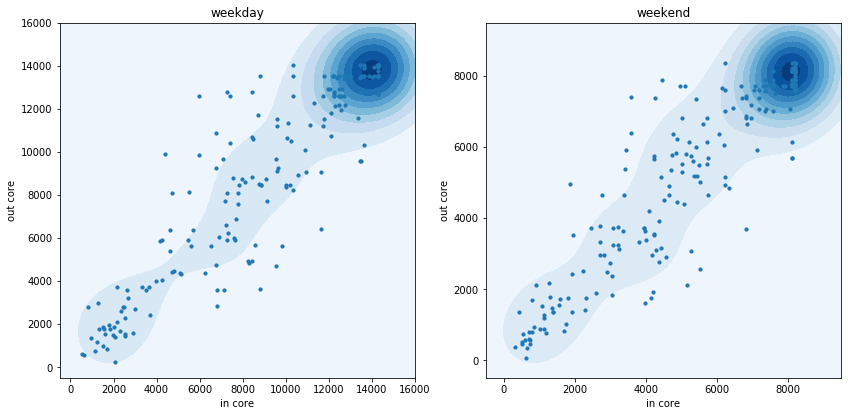

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(14,7), sharex=False, sharey=False)
sns.kdeplot(df_ks["weekday_in_core"], df_ks["weekday_out_core"], ax=axs[0],
                 cmap="Blues", shade=True, shade_lowest=True)
axs[0].scatter(df_ks["weekday_in_core"], df_ks["weekday_out_core"], s=10)
axs[0].set_aspect("equal")
axs[0].set_title("weekday")
axs[0].set_xlim([-500, 16000])
axs[0].set_ylim([-500, 16000])
axs[0].set_xlabel("in core")
axs[0].set_ylabel("out core")

sns.kdeplot(df_ks["weekend_in_core"], df_ks["weekend_out_core"], ax=axs[1],
                 cmap="Blues", shade=True, shade_lowest=True)
axs[1].scatter(df_ks["weekend_in_core"], df_ks["weekend_out_core"], s=10)
axs[1].set_aspect("equal")
axs[1].set_title("weekend")
axs[1].set_xlim([-500, 9500])
axs[1].set_ylim([-500, 9500])
axs[1].set_xlabel("in core")
axs[1].set_ylabel("out core")

In [38]:
df_ks = df_ks.reset_index()
df_ks= df_ks.rename(columns={"index": "node"})
df_ks.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core
0,ADMIRALTY,8845,8436,5350,5185
1,AIRPORT ROAD,2153,2070,515,500
2,ALEXANDRA HILL,14278,14023,8195,8136
3,ALEXANDRA NORTH,5717,6379,2838,2951
4,ALJUNIED,14278,14023,8195,8377


In [39]:
df_ks.to_csv("k_shell_decomposition_result.csv", index_label="ind")

In [6]:
df_ks = pd.read_csv("k_shell_decomposition_result.csv", index_col=0)
df_ks.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core
ind,,,,,
0,ADMIRALTY,8845,8436,5350,5185
1,AIRPORT ROAD,2153,2070,515,500
2,ALEXANDRA HILL,14278,14023,8195,8136
3,ALEXANDRA NORTH,5717,6379,2838,2951
4,ALJUNIED,14278,14023,8195,8377


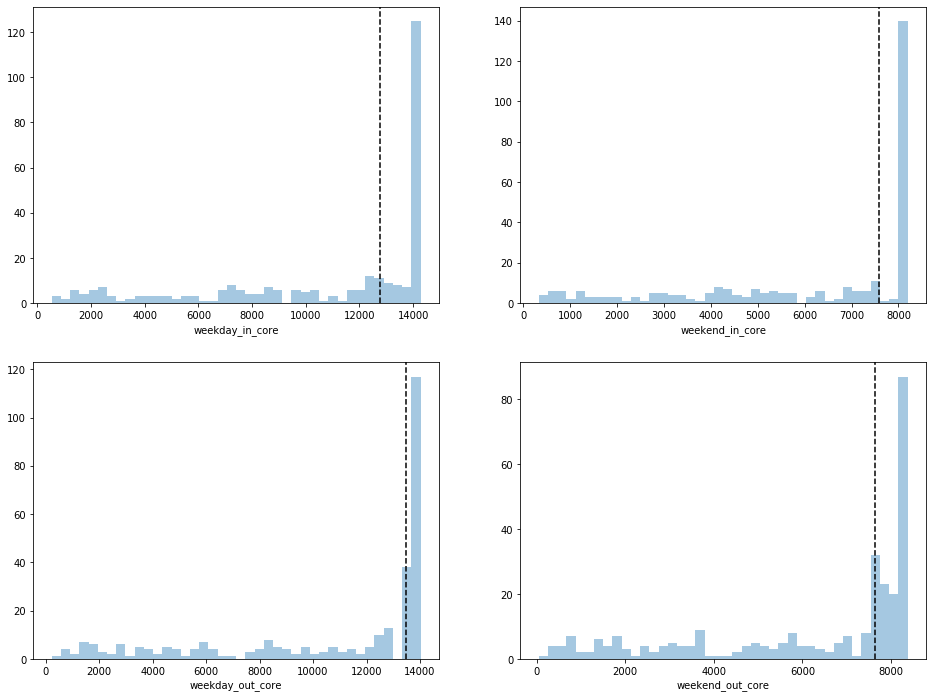

In [60]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()
cols = ["weekday_in_core", "weekend_in_core", "weekday_out_core", "weekend_out_core"]

for i in range(4):
    ax = axs[i]
    vals = df_ks[cols[i]]
    sns.distplot(vals, kde=False, ax=ax, bins = 40)
    ax.axvline(x=np.median(vals), ls="--", c="k")

In [50]:
def quantile(alist, cut=4):
    b0 = 1./cut
    bs = [ i*b0 for i in range(1, cut+1) ]
    breaks = [ np.quantile(alist, b) for b in bs ]
    print(bs, breaks)
    break_list = []
    for a in alist:
        
        i = 0
        while not(a<=breaks[i]):
            i+=1
        """
        i = cut-1
        while not(a>=breaks[i]):
            i-=1
        """
        break_list.append(i)
        
    return break_list


In [62]:
#temp = df_ks[df_ks["weekday_in_core"]<max(df_ks["weekday_in_core"])]["weekday_in_core"]

lvl_1 = quantile(df_ks["weekday_in_core"], cut=2)
check_1 = [ lvl_1.count(i) for i in sorted(list(set(lvl_1))) ], sorted(list(set(lvl_1)))

lvl_2 = quantile(df_ks["weekday_out_core"], cut=2)
check_2 = [ lvl_2.count(i) for i in sorted(list(set(lvl_2))) ], sorted(list(set(lvl_2)))

lvl_3 = quantile(df_ks["weekend_in_core"], cut=2)
check_3 = [ lvl_3.count(i) for i in sorted(list(set(lvl_3))) ], sorted(list(set(lvl_3)))

lvl_4 = quantile(df_ks["weekend_out_core"], cut=2)
check_4 = [ lvl_4.count(i) for i in sorted(list(set(lvl_4))) ], sorted(list(set(lvl_4)))

print(check_1)
print(check_2)
print(check_3)
print(check_4)

[0.5, 1.0] [12758.0, 14278.0]
[0.5, 1.0] [13463.0, 14023.0]
[0.5, 1.0] [7591.0, 8195.0]
[0.5, 1.0] [7644.0, 8377.0]
([152, 151], [0, 1])
([152, 151], [0, 1])
([160, 143], [0, 1])
([152, 151], [0, 1])


In [63]:
df_ks["weekday_in_core_lvl"] = lvl_1
df_ks["weekday_out_core_lvl"] = lvl_2
df_ks["weekend_in_core_lvl"] = lvl_3
df_ks["weekend_out_core_lvl"] = lvl_4

In [66]:
df_ks.head()

,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl
ADMIRALTY,8845,8436,5350,5185,0,0,0,0
AIRPORT ROAD,2153,2070,515,500,0,0,0,0
ALEXANDRA HILL,14278,14023,8195,8136,1,1,1,1
ALEXANDRA NORTH,5717,6379,2838,2951,0,0,0,0
ALJUNIED,14278,14023,8195,8377,1,1,1,1


In [67]:
df_ks.to_csv("k_shell_decomposition_result_wlvl.csv", index_label="node")